In [124]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras_tuner as kt
import numpy as np
from keras import layers
import time

from keras.utils import to_categorical

In [3]:
#The input is MNIST fashion database
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"]

In [6]:
len(X_train_full)

60000

In [7]:
val = 0.1 * 60000
val = int(val)

6000.0

In [4]:
# Set aside 10% of the samples for validation
X_valid, X_train = X_train_full[:val] / 255.0, X_train_full[val:] / 255.0
Y_valid, Y_train = Y_train_full[:val], Y_train_full[val:]

In [29]:
def define_model(learning_rate, optimizer, num_layers, num_neuron):
    # build model
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    # num_neurons and layers
    for layer in range(num_layers):
        model.add(keras.layers.Dense(num_neuron, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))

    # choose optimizers
    if(optimizer == "Nesterov"):
        model.compile(loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["accuracy"])
    elif(optimizer == "Adam"):
        model.compile(loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["accuracy"])
    elif(optimizer == "RMSProp"):
        model.compile(loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        metrics=["accuracy"])

    tmp = model.fit(X_train, Y_train, epochs=10,
                        validation_data=(X_valid, Y_valid),
                        verbose=0)

    # get accuracy
    cost, accuracy = model.evaluate(X_test, Y_test)
    # Check if this model has the best accuracy
    print(learning_rate, optimizer, num_layers, num_neuron)
    return cost, accuracy, model, tmp

In [19]:
define_model(0.001, "Adam", 1, 50)

313/313 [==============================] - 1s 2ms/step - loss: 83.2998 - accuracy: 0.8486


(83.29979705810547,
 0.8485999703407288,
 <keras.engine.sequential.Sequential at 0x248c50d2f10>)

In [20]:
define_model(0.001, "Nesterov", 1, 50)

313/313 [==============================] - 1s 2ms/step - loss: 83.3528 - accuracy: 0.7879


(83.35282897949219,
 0.7878999710083008,
 <keras.engine.sequential.Sequential at 0x248c50d2a30>)

In [21]:
define_model(0.001, "RMSProp", 1, 50)

313/313 [==============================] - 1s 2ms/step - loss: 120.6535 - accuracy: 0.8463


(120.65353393554688,
 0.8463000059127808,
 <keras.engine.sequential.Sequential at 0x248c636ebb0>)

In [22]:
define_model(0.01, "Adam", 1, 50)

313/313 [==============================] - 1s 2ms/step - loss: 121.2276 - accuracy: 0.7849


(121.22757720947266,
 0.7849000096321106,
 <keras.engine.sequential.Sequential at 0x248c636e190>)

In [23]:
define_model(0.1, "Adam", 1, 50)

313/313 [==============================] - 1s 2ms/step - loss: 2.2109 - accuracy: 0.1399


(2.2109336853027344,
 0.13989999890327454,
 <keras.engine.sequential.Sequential at 0x248a1c2d640>)

Pick 0.001

In [24]:
define_model(0.001, "Adam", 3, 50)

313/313 [==============================] - 1s 2ms/step - loss: 75.7626 - accuracy: 0.8368


(75.7625732421875,
 0.8367999792098999,
 <keras.engine.sequential.Sequential at 0x248c65fbd90>)

In [25]:
define_model(0.001, "Adam", 5, 50)

313/313 [==============================] - 1s 2ms/step - loss: 62.2492 - accuracy: 0.8320


(62.24919891357422,
 0.8320000171661377,
 <keras.engine.sequential.Sequential at 0x248c66563a0>)

Pick 1

In [26]:
define_model(0.001, "Adam", 1, 200)

313/313 [==============================] - 1s 2ms/step - loss: 105.5203 - accuracy: 0.8598


(105.52030944824219,
 0.8597999811172485,
 <keras.engine.sequential.Sequential at 0x248c65155e0>)

In [30]:
cost, accuracy, model_cur, history= define_model(0.001, "Adam", 1, 500)

313/313 [==============================] - 1s 3ms/step - loss: 94.0861 - accuracy: 0.8776
0.001 Adam 1 500


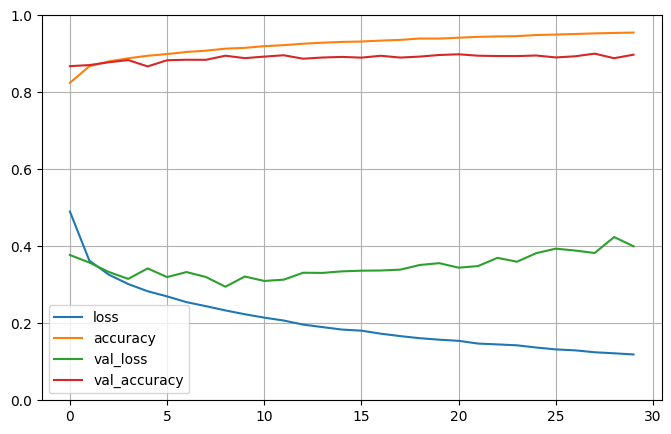

In [37]:
df = pd.DataFrame(history.history)
df.plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
def build(hp):
     # build model
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    # hidden layers and nuerons
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.Dense(hp.Choice('neurons', values=[50,100,200,500]),
                                     activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))

    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    optimizer = hp.Choice('optimizer', values=['SGD', 'Adam', 'RMSProp'])
    # get the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [46]:
randS = kt.RandomSearch(build,
                        objective='val_accuracy',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='mnist_fashion')

In [ ]:
randS.search(X_train_full, Y_train_full, epochs=10, validation_data=(X_valid*255, Y_valid))
randS.get_best_models(num_models=1)[0]
randS.get_best_hyperparameters(num_trials=1)[0]


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
5                 |?                 |num_layers
500               |?                 |neurons
0.1               |?                 |learning_rate
Adam              |?                 |optimizer

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.8644 - accuracy: 0.7954 - val_loss: 0.5096 - val_accuracy: 0.8213
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4470 - accuracy: 0.8407 - val_loss: 0.4307 - val_accuracy: 0.8428
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4161 - accuracy: 0.8534 - val_loss: 0.4644 - val_accuracy: 0.8508
Epoch 4/10
   4/1875 [..............................] - ETA: 41s - loss: 0.4054 - accuracy: 0.8516 

In [59]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[np.isin(y_train,[0, 1, 2, 3, 4])]
y_train = y_train[np.isin(y_train,[0, 1, 2, 3, 4])]
x_test = x_test[np.isin(y_test,[0, 1, 2, 3, 4])]
y_test = y_test[np.isin(y_test,[0, 1, 2, 3, 4])]
x_train = x_train.reshape(-1, 28 * 28)
x_train = x_train/255.0
x_test = x_test.reshape(-1, 28 * 28)
x_test = x_test/255.0

In [55]:
model = keras.Sequential([
    layers.Dense(100, activation='elu', input_shape=(28*28,)),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(5, activation='softmax')
])

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkPoint = keras.callbacks.ModelCheckpoint('model_chck.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[earlyStop, checkPoint])

Epoch 1/15
957/957 [==============================] - 11s 8ms/step - loss: 0.0072 - accuracy: 0.9992 - val_loss: 0.0445 - val_accuracy: 0.9928
Epoch 2/15
957/957 [==============================] - 6s 6ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0440 - val_accuracy: 0.9936
Epoch 3/15
957/957 [==============================] - 8s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0420 - val_accuracy: 0.9932
Epoch 4/15
957/957 [==============================] - 6s 6ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0428 - val_accuracy: 0.9936
Epoch 5/15
957/957 [==============================] - 6s 7ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0396 - val_accuracy: 0.9942
Epoch 6/15
957/957 [==============================] - 6s 6ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0482 - val_accuracy: 0.9934
Epoch 7/15
957/957 [==============================] - 6s 7ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0750 - val_accuracy: 0.9920
Epoch

In [61]:
loss_Q3, acc_Q3 = model.evaluate(x_test, y_test)
loss_Q3
acc_Q3
model.save('model.h5')

161/161 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9912


In [65]:
a =  keras.models.load_model("model_chck.h5")

In [71]:
start_time = time.time()

In [72]:
history = a.fit(X_train, Y_train, epochs=10,
                      validation_split=0.2)
end_time = time.time()
start_time - end_time

Epoch 1/10
765/765 [==============================] - 12s 14ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 2/10
765/765 [==============================] - 6s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0079 - val_accuracy: 0.9974
Epoch 3/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0075 - val_accuracy: 0.9979
Epoch 4/10
765/765 [==============================] - 7s 9ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 5/10
765/765 [==============================] - 5s 7ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 6/10
765/765 [==============================] - 6s 8ms/step - loss: 1.8784e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/10
765/765 [==============================] - 7s 8ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0118 - val_accuracy: 0.9971


-192.34797358512878

In [111]:
a.save_weights("yourKerasWeights.ckpt")

In [74]:
history_20_a = a.fit(X_train, Y_train, epochs=20,
                      validation_split=0.2)

Epoch 1/20
765/765 [==============================] - 6s 7ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0077 - val_accuracy: 0.9985
Epoch 2/20
765/765 [==============================] - 6s 7ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0204 - val_accuracy: 0.9953
Epoch 3/20
765/765 [==============================] - 5s 7ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0145 - val_accuracy: 0.9961
Epoch 4/20
765/765 [==============================] - 5s 7ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0053 - val_accuracy: 0.9979
Epoch 5/20
765/765 [==============================] - 5s 7ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 6/20
765/765 [==============================] - 6s 8ms/step - loss: 6.2912e-04 - accuracy: 0.9999 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 7/20
765/765 [==============================] - 6s 8ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 0.9982
Ep

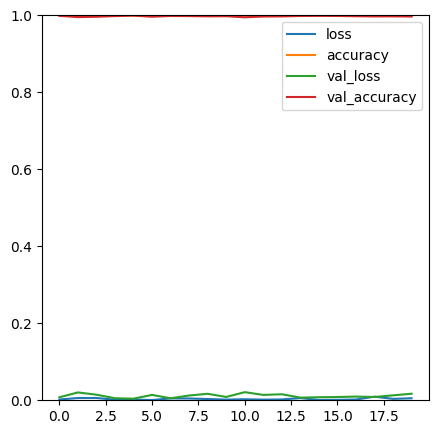

In [79]:
df = pd.DataFrame(history_20_a.history)
df.plot(figsize=(5, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [169]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[np.isin(y_train,[5, 6, 7, 8, 9])]
y_train = y_train[np.isin(y_train,[5, 6, 7, 8, 9])]
x_test = x_test[np.isin(y_test,[5, 6, 7, 8, 9])]
y_test = y_test[np.isin(y_test,[5, 6, 7, 8, 9])]
x_train = x_train.reshape(-1, 28 * 28)
x_train = x_train/255.0
x_test = x_test.reshape(-1, 28 * 28)
x_test = x_test/255.0

In [161]:
# X_train_100 = []
# y_train_100 = []
# for d in range(5):
#     image = np.where(y_train== d)[0][:100]
#     for i in image:
#         X_train_100.append(X_train[i])
#         y_train_100.append(y_train[i])
# X_train_100 = np.array(X_train_100)
# y_train_100 = np.array(y_train_100)

In [170]:
b = keras.Sequential([
    layers.Dense(100, activation='elu', input_shape=(28*28,)),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(100, activation='elu'),
    layers.Dense(5, activation='softmax')
])

In [163]:
b.load_weights("yourKerasWeights.ckpt")

In [178]:
# Compile the model with a Softmax output layer and categorical cross-entropy loss function
b.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [182]:
# earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkPoint = keras.callbacks.ModelCheckpoint('model_chck_b.h5', save_best_only=True)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[y_train >= 5]
y_train = y_train[y_train >= 5] - 5
x_test = x_test[y_test >= 5]
y_test = y_test[y_test >= 5] - 5
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
start = time.time()
history = b.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
time.time()-start

Epoch 1/20
919/919 [==============================] - 5s 6ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0725 - val_accuracy: 0.9835
Epoch 2/20
919/919 [==============================] - 6s 6ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0644 - val_accuracy: 0.9833
Epoch 3/20
919/919 [==============================] - 5s 6ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0726 - val_accuracy: 0.9827
Epoch 4/20
919/919 [==============================] - 5s 6ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0582 - val_accuracy: 0.9848
Epoch 5/20
919/919 [==============================] - 5s 6ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.1072 - val_accuracy: 0.9778
Epoch 6/20
919/919 [==============================] - 5s 6ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0662 - val_accuracy: 0.9860
Epoch 7/20
919/919 [==============================] - 5s 5ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0761 - val_accuracy: 0.9854
Epoch 

102.68135190010071

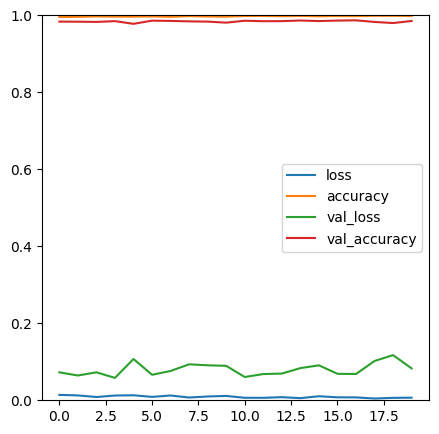

In [183]:
df = pd.DataFrame(history.history)
df.plot(figsize=(5, 5))
plt.gca().set_ylim(0, 1)
plt.show()